In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing/housing.csv


## **Import Important Libraries**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score
from sklearn.metrics import f1_score,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer,MissingIndicator




## **Loading the Dataset**

In [4]:
df=pd.read_csv('/kaggle/input/california-housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Information abouy Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## **Describe the Dataset**

In [107]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-1.607568e-01,35.631861,28.639486,178.766949,98.529311,138.443481,65.651090,1.516995,28.272320,1.165843
std,1.855595e-15,2.135952,12.585558,41.758242,26.616290,33.735133,16.746235,0.358677,2.562006,1.420662
min,-1.607568e-01,32.540000,1.000000,2.602388,0.000000,3.864779,1.143879,0.405398,18.585893,0.000000
25%,-1.607568e-01,33.930000,18.000000,155.389352,82.239175,118.931194,56.047865,1.270715,26.449729,0.000000
50%,-1.607568e-01,34.260000,29.000000,177.226831,96.796061,137.265730,64.941812,1.511781,28.245367,1.000000
75%,-1.607568e-01,37.710000,37.000000,201.453396,113.674594,157.271611,75.006470,1.748025,30.040763,1.000000
max,-1.607568e-01,41.950000,52.000000,410.478760,167.366167,378.468732,154.004146,2.772595,33.182650,4.000000


## **Sum the Null value in Dataset**

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## **Handling the missing value**

In [111]:
SI=SimpleImputer()
df['total_bedrooms']=SI.fit_transform(df[['total_bedrooms']])

## **Label Encoding On Categorical Columns**

In [112]:
LE=LabelEncoder()
df['ocean_proximity']=LE.fit_transform(df['ocean_proximity'])

In [113]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14709,-0.160757,32.79,25.0,186.695462,84.230796,125.555573,58.282418,2.178563,30.266881,4
2524,-0.160757,39.55,28.0,156.256661,77.471365,112.103379,53.195226,1.446919,24.844566,1
2047,-0.160757,36.72,15.0,164.708275,75.725574,117.732232,51.934684,2.056199,26.715624,1
841,-0.160757,37.59,16.0,168.026069,89.772317,145.176249,61.522319,1.655367,27.619765,3
17031,-0.160757,37.50,44.0,89.924212,43.446299,59.941745,30.795355,1.752811,29.841212,4
4766,-0.160757,34.03,43.0,163.946346,91.194207,130.694305,61.788699,1.133915,26.925695,0
11079,-0.160757,33.81,26.0,240.485520,134.174408,180.326344,88.915683,1.615897,29.673012,0
18564,-0.160757,36.92,29.0,145.840231,80.288313,123.077619,54.572063,1.412498,27.611226,0
2282,-0.160757,36.79,33.0,180.842661,96.975991,128.275639,65.181100,1.368665,24.123289,1
20599,-0.160757,39.16,35.0,178.057559,97.065730,130.321124,64.941812,0.948835,23.801077,1


## **Normalizing the Shew Data**

In [38]:
df['total_rooms']=np.log1p(df['total_rooms'])
df['total_bedrooms']=np.log1p(df['total_bedrooms'])
df['population']=np.log1p(df['population'])
df['households']=np.log1p(df['households'])
df['median_income']=np.log1p(df['median_income'])

In [39]:
df.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms          -1.075533
total_bedrooms       -1.173704
population           -1.044087
households           -1.051607
median_income         0.226083
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

## **Using PowerTransformer**

In [70]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
features = ['longitude','total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']
df[features] = pt.fit_transform(df[features])

## **Plotting the Histtogram on Dataset**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

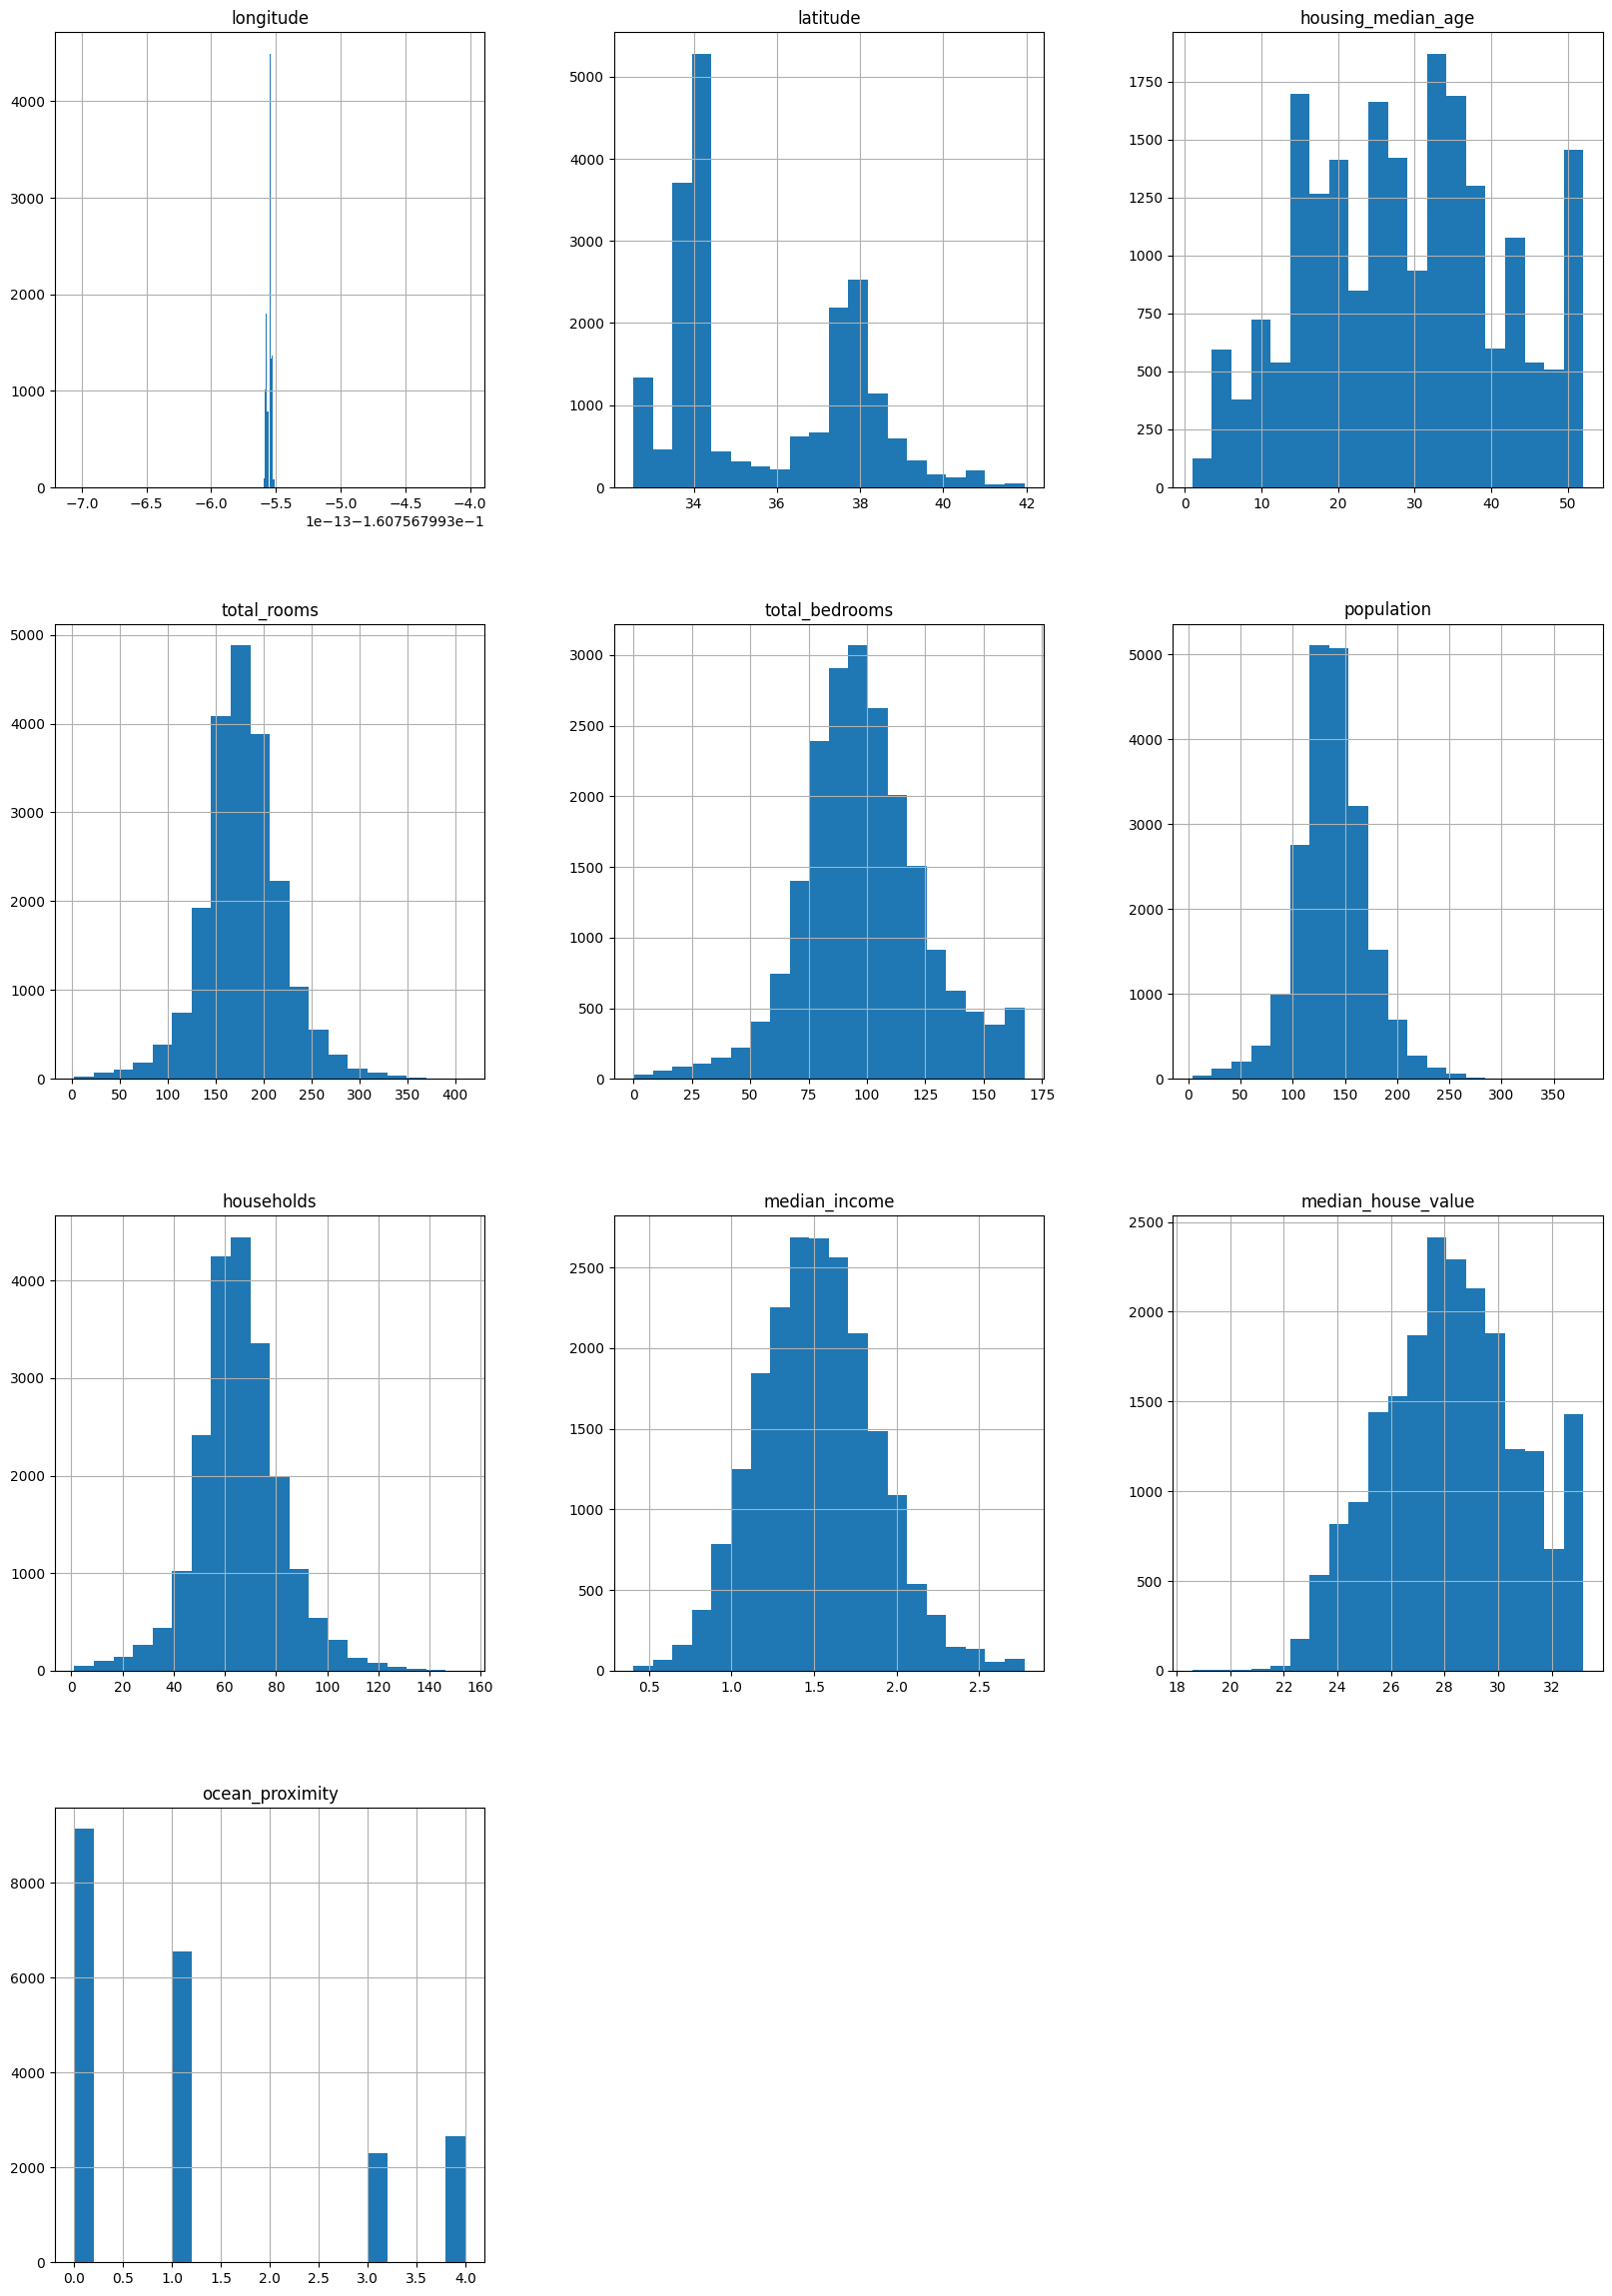

In [71]:
df.hist(bins=20, figsize=(20,29))

## **Split the Data into X and y**

In [92]:
X = df[['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households']]
y = df['median_house_value']

## **Standerize the X Columns**

In [93]:
scale=StandardScaler()

X=scale.fit_transform(X)

## **Spliting The Data For Training and Testing**

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

## **Fitting the Model**

In [95]:
model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

## **Predict the Data**

In [96]:
y_pred=model.predict(X_test)


## **Evaluating the Data**

In [106]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')



MSE: 3.9274194867656496
RMSE: 1.9817718049174202
MAE: 1.4573283970526834
R² Score: 0.40101669767788983
